### Importing the libraries

In [48]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import os
import cv2
from glob import glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

### Visualization of training parameters

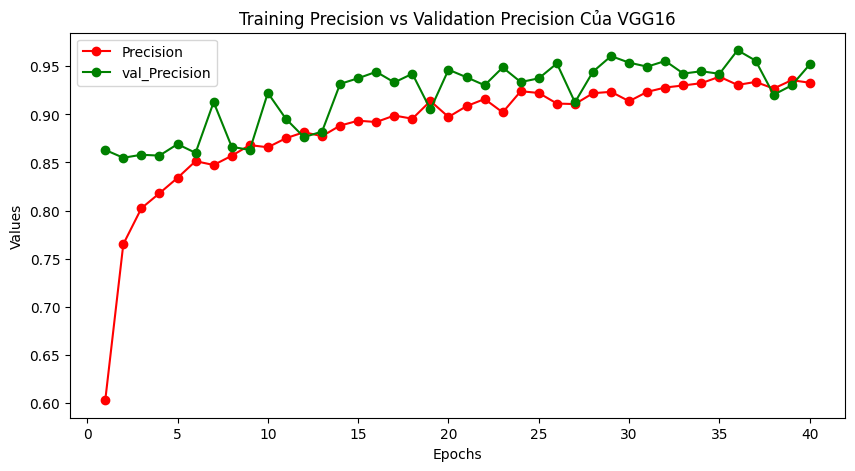

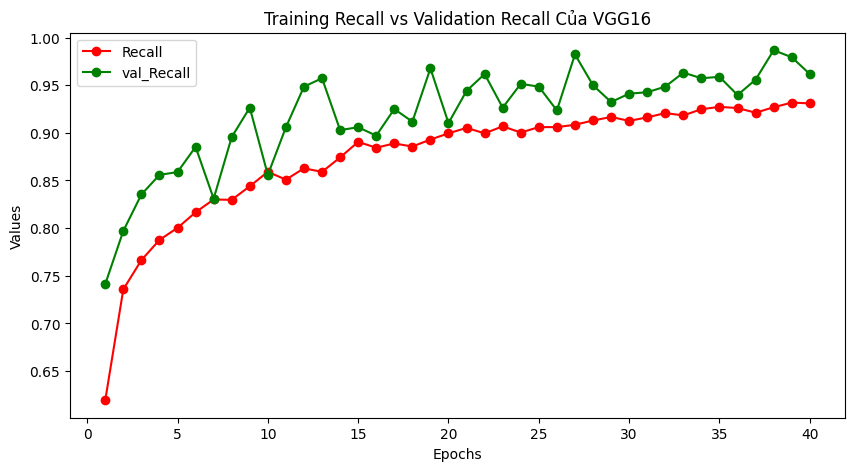

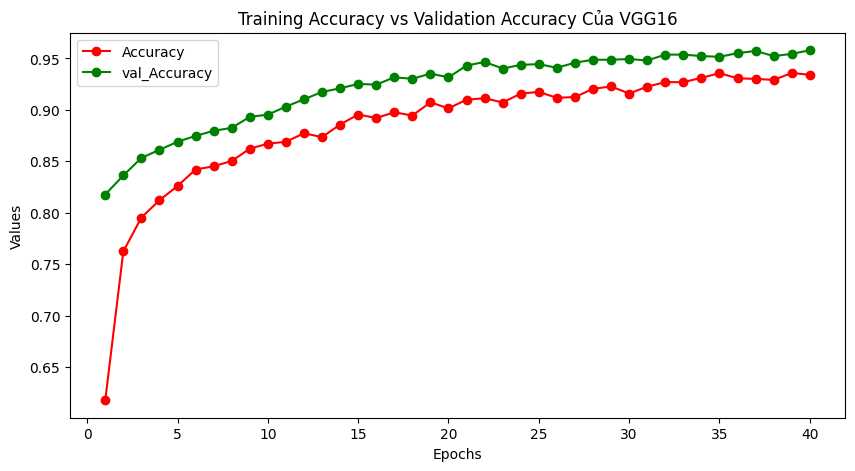

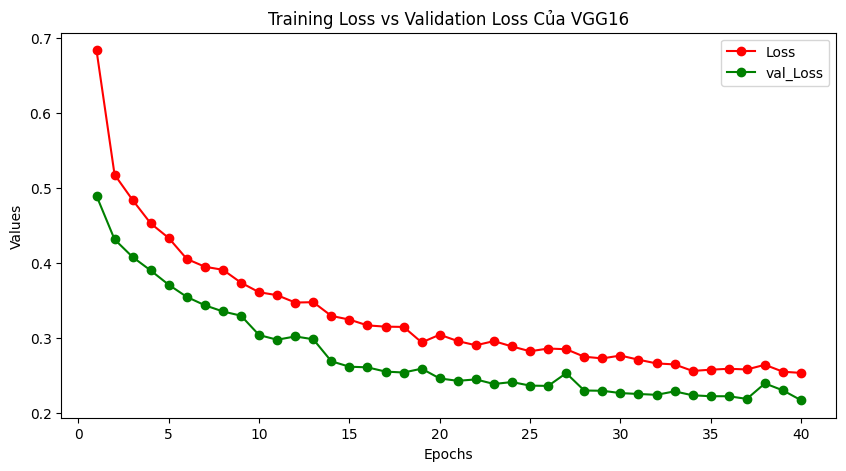

In [ ]:
# Vgg16
vgg16_pkl_path = r'F:\khanh_covid\model\vgg16_modify_last_state.pkl'

with open(vgg16_pkl_path, 'rb') as file:
    vgg16_pkl = pkl.load(file)

# Precision
plt.figure(figsize=(10, 5))
epochs = np.arange(1, len(vgg16_pkl['accuracy'])+1)

plt.plot(epochs, vgg16_pkl['precision_1'], marker='o', linestyle='-', color='r', label='Precision')
plt.plot(epochs, vgg16_pkl['val_precision_1'], marker='o', linestyle='-', color='g', label='val_Precision')

# thêm các thuộc tính của biểu đồ
plt.title("Training Precision vs Validation Precision Của VGG16")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()


#Recall
plt.figure(figsize=(10, 5))
plt.plot(epochs, vgg16_pkl['recall_1'], marker='o', linestyle='-', color='r', label='Recall')
plt.plot(epochs, vgg16_pkl['val_recall_1'], marker='o', linestyle='-', color='g', label='val_Recall')

# thêm các thuộc tính của biểu đồ
plt.title("Training Recall vs Validation Recall Của VGG16")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

#Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, vgg16_pkl['accuracy'], marker='o', linestyle='-', color='r', label='Accuracy')
plt.plot(epochs, vgg16_pkl['val_accuracy'], marker='o', linestyle='-', color='g', label='val_Accuracy')

# thêm các thuộc tính của biểu đồ
plt.title("Training Accuracy vs Validation Accuracy Của VGG16")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

#Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, vgg16_pkl['loss'], marker='o', linestyle='-', color='r', label='Loss')
plt.plot(epochs, vgg16_pkl['val_loss'], marker='o', linestyle='-', color='g', label='val_Loss')

# thêm các thuộc tính của biểu đồ
plt.title("Training Loss vs Validation Loss Của VGG16")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

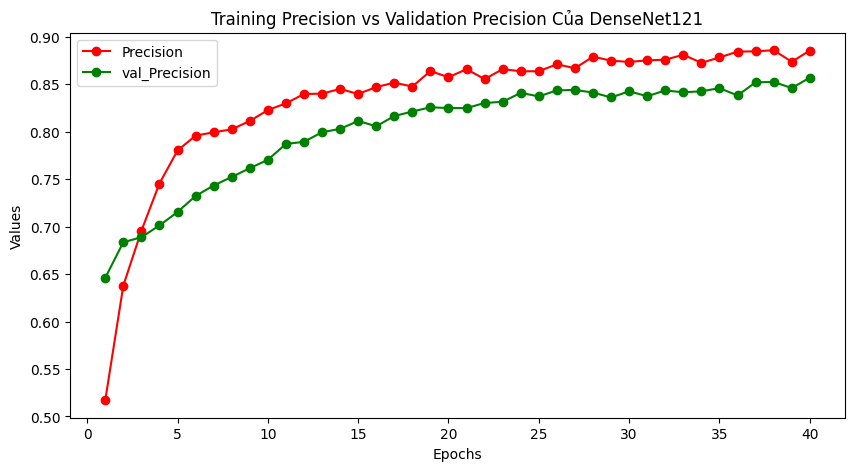

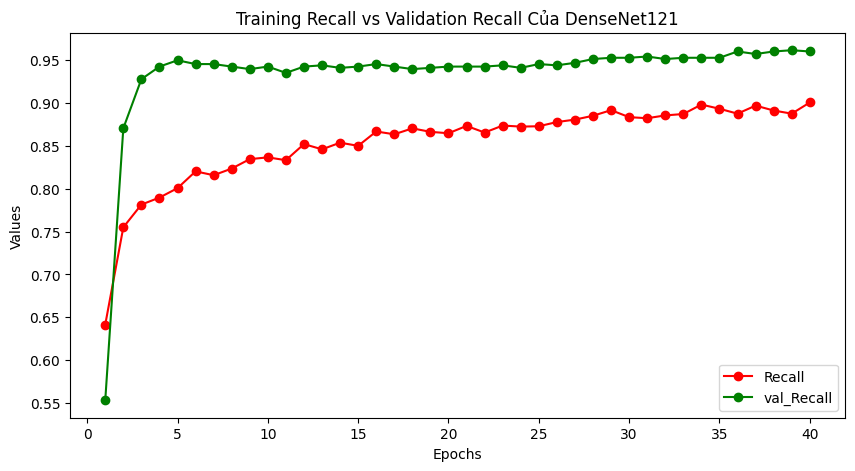

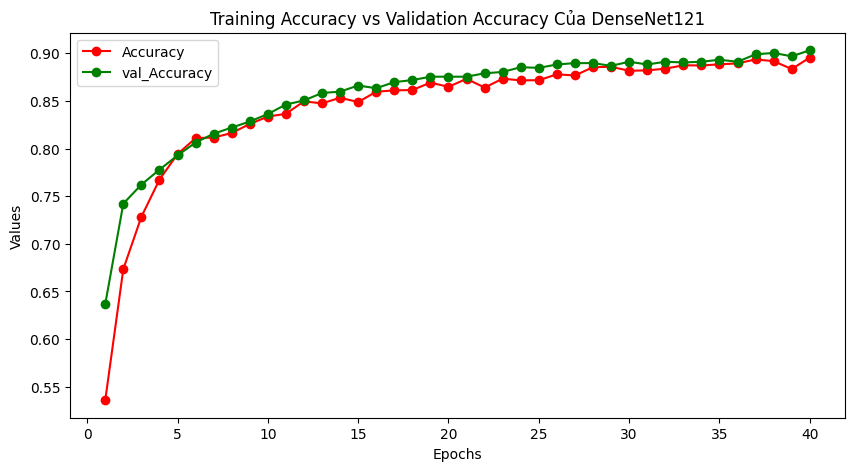

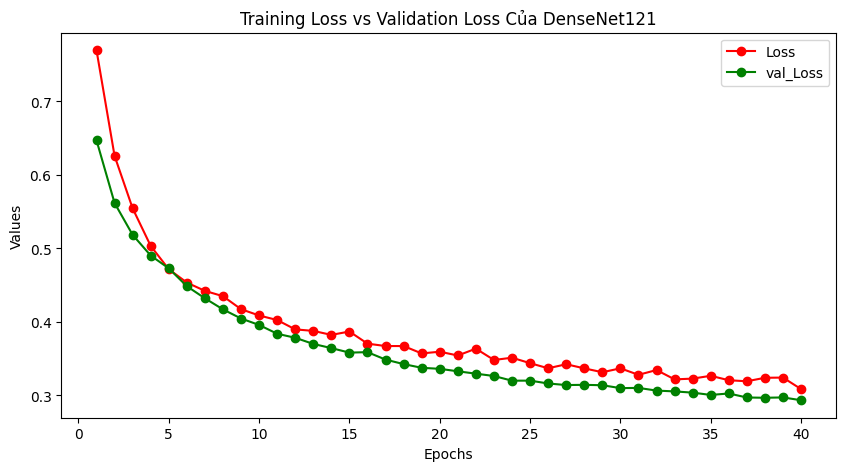

In [ ]:
# DenseNet121
dense_net121_pkl_path = r'F:\khanh_covid\model\dense_net121.pkl'

with open(dense_net121_pkl_path, 'rb') as file:
    dense_net121_pkl = pkl.load(file)
# Precision
plt.figure(figsize=(10, 5))
epochs = np.arange(1, len(dense_net121_pkl['accuracy'])+1)

plt.plot(epochs, dense_net121_pkl['precision_3'], marker='o', linestyle='-', color='r', label='Precision')
plt.plot(epochs, dense_net121_pkl['val_precision_3'], marker='o', linestyle='-', color='g', label='val_Precision')

# thêm các thuộc tính của biểu đồ
plt.title("Training Precision vs Validation Precision Của DenseNet121")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()


#Recall
plt.figure(figsize=(10, 5))
plt.plot(epochs, dense_net121_pkl['recall_3'], marker='o', linestyle='-', color='r', label='Recall')
plt.plot(epochs, dense_net121_pkl['val_recall_3'], marker='o', linestyle='-', color='g', label='val_Recall')

# thêm các thuộc tính của biểu đồ
plt.title("Training Recall vs Validation Recall Của DenseNet121")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

#Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, dense_net121_pkl['accuracy'], marker='o', linestyle='-', color='r', label='Accuracy')
plt.plot(epochs, dense_net121_pkl['val_accuracy'], marker='o', linestyle='-', color='g', label='val_Accuracy')

# thêm các thuộc tính của biểu đồ
plt.title("Training Accuracy vs Validation Accuracy Của DenseNet121")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

#Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, dense_net121_pkl['loss'], marker='o', linestyle='-', color='r', label='Loss')
plt.plot(epochs, dense_net121_pkl['val_loss'], marker='o', linestyle='-', color='g', label='val_Loss')

# thêm các thuộc tính của biểu đồ
plt.title("Training Loss vs Validation Loss Của DenseNet121")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

### Test

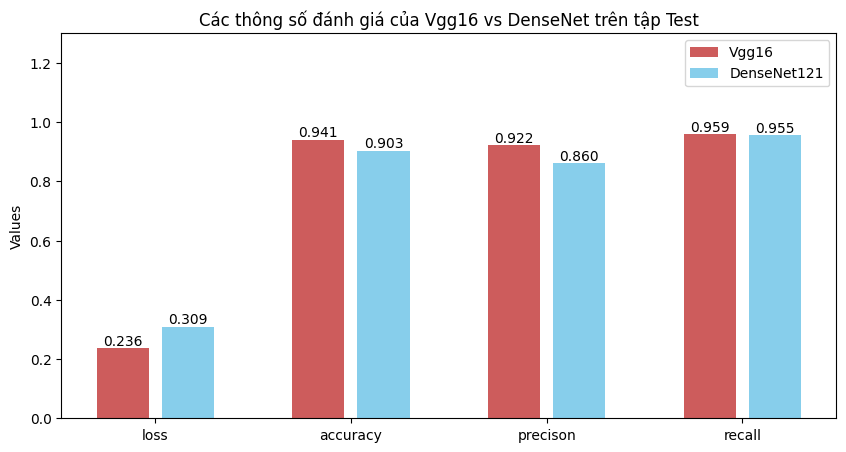

In [34]:
# Đã test trên Kaggle
# vgg16 : [0.23698048293590546, 0.9412811398506165, 0.9222614765167236, 0.9595588445663452]
# DenseNet121: [0.30909937620162964, 0.9039145708084106, 0.860927164554596, 0.9558823704719543]
plt.figure(figsize=(10, 5))
vgg16 = [0.23698048293590546, 0.9412811398506165, 0.9222614765167236, 0.9595588445663452]
denseNet121 = [0.30909937620162964, 0.9039145708084106, 0.860927164554596, 0.9558823704719543]

labels = ['loss', 'accuracy', 'precison', 'recall']
vgg16_position = [1, 4, 7, 10]
denseNet121_position = [2, 5, 8, 11]

plt.bar(vgg16_position, vgg16, label = 'Vgg16', color='indianred')
plt.bar(denseNet121_position, denseNet121, label = 'DenseNet121', color='skyblue')

# thêm thông số
for i,j in zip(vgg16_position, vgg16):
    plt.text(i,j, str(j)[:5], ha='center', va='bottom')

for i,j in zip(denseNet121_position, denseNet121):
    plt.text(i,j, str(j)[:5], ha='center', va='bottom')

plt.title('Các thông số đánh giá của Vgg16 vs DenseNet trên tập Test')
plt.ylabel('Values')
plt.xticks((np.array(vgg16_position)+np.array(denseNet121_position))/2, labels)
plt.ylim(0,1.3)
plt.legend()
plt.show()

In [43]:
# vgg 16
TEST_DIR=r"D:\khanh_covid\split_data\test"

labels = []
images = []
for id, class_ in enumerate(os.listdir(TEST_DIR)):
    class_ = os.path.join(TEST_DIR, class_, '*')

    for img_path in glob(class_):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224,224))
        img = img/255.0
        labels.append(id)
        images.append(img)
    
labels = np.array(labels).reshape(-1,1)
images = np.array(images)

print('labels shape: {0} \n images shape: {1}'.format(labels.shape, images.shape))

{
    "covid": 0,
    "normal": 1
}


labels shape: (562, 1) 
 images shape: (562, 224, 224, 3)


{'covid': 0, 'normal': 1}

In [42]:
# load model
vgg16_path = r"D:\khanh_covid\model\vgg16_modify_last_state.keras"
densenet121_path = r"D:\khanh_covid\model\dense_net121.keras"

vgg16_model = tf.keras.models.load_model(vgg16_path)
densenet121_model = tf.keras.models.load_model(densenet121_path)

In [47]:
pred_vgg16 = []
pred_densenet121 = []

test = tqdm(images, total=len(images), desc="test")
for img in test:
    img = img.reshape(1,224,224,3)
    pred_16 = vgg16_model.predict(img, verbose=0)
    pred_121 = densenet121_model.predict(img, verbose=0)
    pred_vgg16.append(np.round(pred_16[0, 0]))
    pred_densenet121.append(np.round(pred_121[0, 0]))

pred_vgg16 = np.array(pred_vgg16).reshape(-1, 1)
pred_densenet121 = np.array(pred_densenet121).reshape(-1, 1)
pred_densenet121.shape, pred_vgg16.shape

test:   0%|          | 0/562 [00:00<?, ?it/s]

test: 100%|██████████| 562/562 [04:00<00:00,  2.34it/s]


((562, 1), (562, 1))

accuracy_socre: 0.9341637010676157
precision_score: 0.9349721789168156
recall_score: 0.9350659229208925


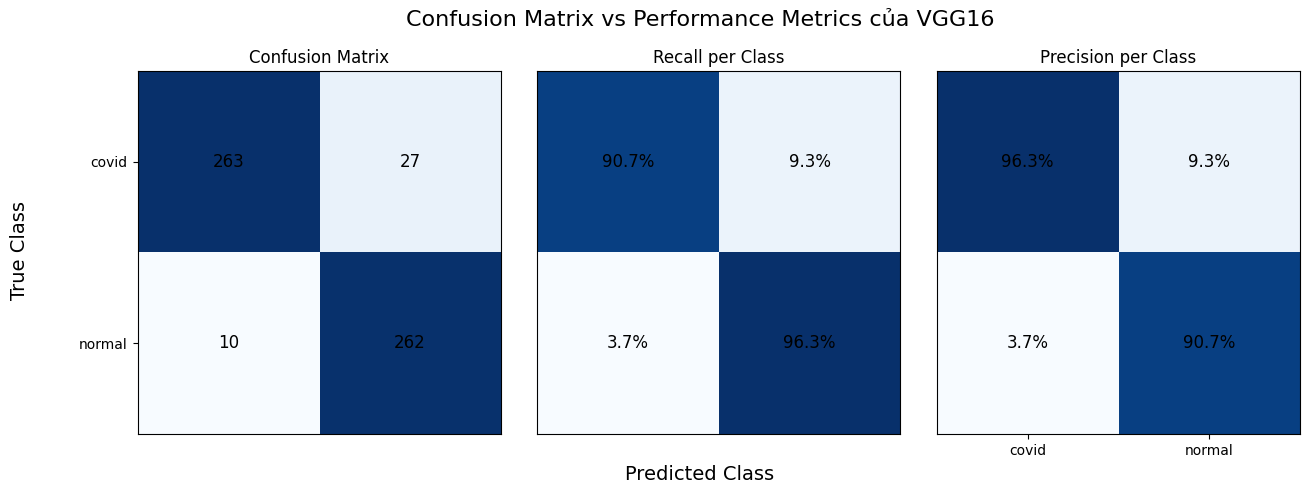

In [52]:
# Tạo confusion matrix vgg16
data = np.array(confusion_matrix(labels, pred_vgg16))
print('accuracy_socre:', accuracy_score(labels, pred_vgg16))
print('precision_score:', precision_score(labels, pred_vgg16, average='macro'))
print('recall_score:', recall_score(labels, pred_vgg16, average='macro'))

recall = data.astype('float') / data.sum(axis=1)[:, np.newaxis]
precision = data.astype('float') / data.sum(axis=0)
x = [data, np.round(recall, decimals=3), np.round(precision, decimals=3)]

nrow = 1
ncol = 3
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrow, ncol, figure=fig, wspace=0.1)  # Adjust wspace here

titles = ['Confusion Matrix', 'Recall per Class', 'Precision per Class']

for index, item in enumerate(x):
    sp = fig.add_subplot(gs[index])
    im = sp.imshow(item, interpolation='nearest', cmap=plt.cm.Blues)
    
    if index == 0:
        for i in range(item.shape[0]):
            for j in range(data.shape[1]):
                sp.text(j, i, str(item[i, j]), fontsize=12,
                        horizontalalignment='center',
                        verticalalignment='center', color='black')
        sp.set_xticks([])
        sp.set_yticks(np.arange(data.shape[0]))
        sp.set_yticklabels(["covid", "normal"])
    else:
        for i in range(item.shape[0]):
            for j in range(data.shape[1]):
                sp.text(j, i, str(np.round(item[i, j]*100, decimals=3)) + '%', fontsize=12,
                        horizontalalignment='center',
                        verticalalignment='center', color='black')
       
        if index != 2:
            sp.set_xticks([])
            sp.set_yticks([])
        else:
            sp.set_yticks([])
            sp.set_xticks(np.arange(data.shape[0]))
            sp.set_xticklabels(["covid", "normal"])
    
    sp.set_title(titles[index])

# Đặt tiêu đề cho toàn bộ biểu đồ
plt.suptitle("Confusion Matrix vs Performance Metrics của VGG16", fontsize=16)

# Đặt nhãn trục y cho toàn bộ figure
fig.text(0.04, 0.5, 'True Class', va='center', rotation='vertical', fontsize=14)

# Đặt nhãn trục x cho toàn bộ figure
fig.text(0.5, 0.04, 'Predicted Class', ha='center', fontsize=14)

plt.show()


accuracy_socre: 0.9092526690391459
precision_score: 0.9103422477523744
recall_score: 0.9102434077079107


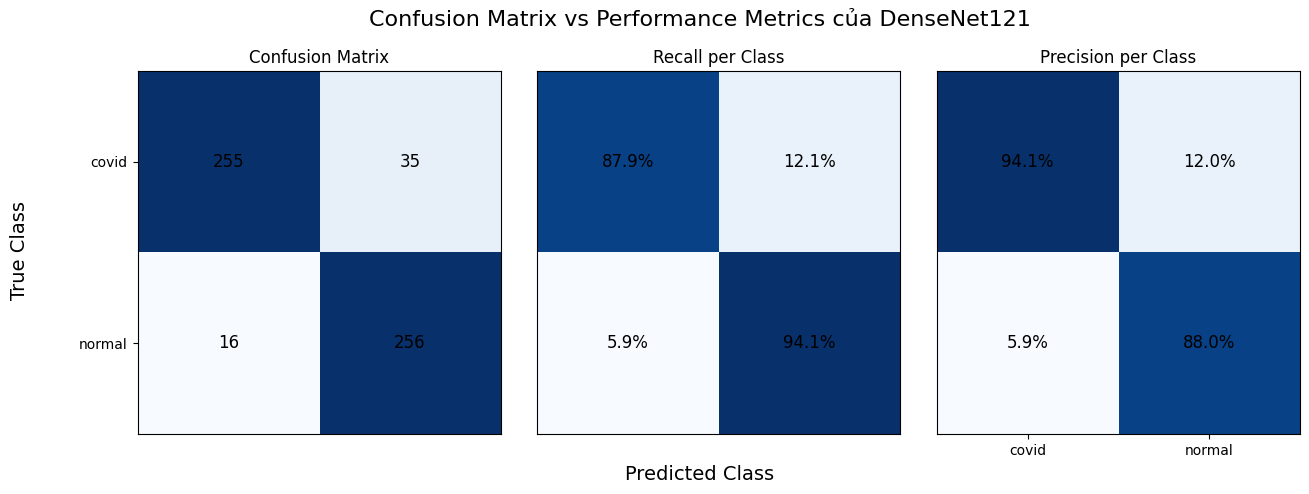

In [53]:
# Tạo confusion matrix DenseNet121
data = np.array(confusion_matrix(labels, pred_densenet121))
print('accuracy_socre:', accuracy_score(labels, pred_densenet121))
print('precision_score:', precision_score(labels, pred_densenet121, average='macro'))
print('recall_score:', recall_score(labels, pred_densenet121, average='macro'))

recall = data.astype('float') / data.sum(axis=1)[:, np.newaxis]
precision = data.astype('float') / data.sum(axis=0)
x = [data, np.round(recall, decimals=3), np.round(precision, decimals=3)]

nrow = 1
ncol = 3
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrow, ncol, figure=fig, wspace=0.1)  # Adjust wspace here

titles = ['Confusion Matrix', 'Recall per Class', 'Precision per Class']

for index, item in enumerate(x):
    sp = fig.add_subplot(gs[index])
    im = sp.imshow(item, interpolation='nearest', cmap=plt.cm.Blues)
    
    if index == 0:
        for i in range(item.shape[0]):
            for j in range(data.shape[1]):
                sp.text(j, i, str(item[i, j]), fontsize=12,
                        horizontalalignment='center',
                        verticalalignment='center', color='black')
        sp.set_xticks([])
        sp.set_yticks(np.arange(data.shape[0]))
        sp.set_yticklabels(["covid", "normal"])
    else:
        for i in range(item.shape[0]):
            for j in range(data.shape[1]):
                sp.text(j, i, str(np.round(item[i, j]*100, decimals=3)) + '%', fontsize=12,
                        horizontalalignment='center',
                        verticalalignment='center', color='black')
       
        if index != 2:
            sp.set_xticks([])
            sp.set_yticks([])
        else:
            sp.set_yticks([])
            sp.set_xticks(np.arange(data.shape[0]))
            sp.set_xticklabels(["covid", "normal"])
    
    sp.set_title(titles[index])

# Đặt tiêu đề cho toàn bộ biểu đồ
plt.suptitle("Confusion Matrix vs Performance Metrics của DenseNet121", fontsize=16)

# Đặt nhãn trục y cho toàn bộ figure
fig.text(0.04, 0.5, 'True Class', va='center', rotation='vertical', fontsize=14)

# Đặt nhãn trục x cho toàn bộ figure
fig.text(0.5, 0.04, 'Predicted Class', ha='center', fontsize=14)

plt.show()
